In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("SMS_train.csv", encoding = "ISO-8859-1")

In [3]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [4]:
data["Label"].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [5]:
data.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [6]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Label"] = encoder.fit_transform(data["Label"])
print(data["Label"].unique())
data.isnull().sum()

[0 1]


S. No.          0
Message_body    0
Label           0
dtype: int64

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the data (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message_body'])


In [14]:
joblib.dump(vectorizer, "vectorizer.joblib")

['vectorizer.joblib']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, data['Label'], test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.953125
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       165
           1       1.00      0.67      0.80        27

    accuracy                           0.95       192
   macro avg       0.97      0.83      0.89       192
weighted avg       0.96      0.95      0.95       192



In [13]:
import joblib 
joblib.dump(log_reg, "model.joblib")

['model.joblib']

In [9]:
import seaborn as sns

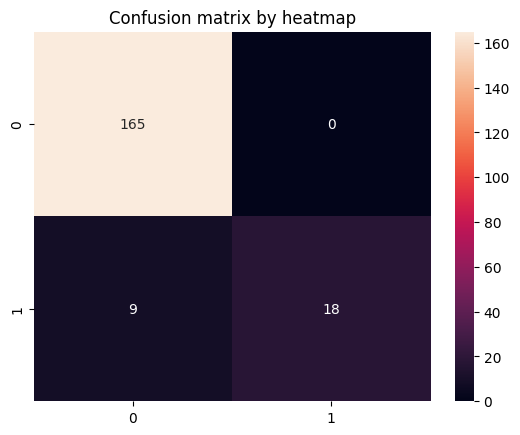

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = "d", color = "red")
plt.title("Confusion matrix by heatmap")
plt.show()

In [11]:
def predicted_model(message):
    message_vectorized = vectorizer.transform([message])
    prediction = log_reg.predict(message_vectorized)[0]
    return "Spam" if prediction == 1 else "Non-Spam"

# Test prediction function
message = "Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876"
print(predicted_model(message))

Spam


In [12]:
def predicted_model(message):
    message_vectorized = vectorizer.transform([message])
    prediction = log_reg.predict(message_vectorized)[0]
    return "Spam" if prediction == 1 else "Non-Spam"

# Test prediction function
message = """
Hi Riyaz,
You previously turned on the Timeline setting—formerly called Location History —which helps you go back in time and remember where you’ve been. With Timeline, your visits and routes are automatically saved to a map on each of your devices.
Timeline is changing and will now be created on your device. As part of this, you'll need to choose settings for your data by December 8, 2024 to avoid losing visits and routes.
	
How it works
Like before, your devices will continue to save your visits in Timeline when this setting is on. But now, if you're signed in on multiple smartphones, each device will save new visits on its own Timeline.
	
What you need to do
If you’d like to keep your saved visits and routes, choose your settings on your preferred smartphone by December 8, 2024. (You may first need to update the Google Maps app.) Learn more about how to keep your Timeline data.
After you do this, you’ll only be able to use Timeline in the app.
If you take no action, you may lose data. Google will try moving up to 90 days of Timeline data to the first signed-in device you use after December 8, 2024. Your older data will be deleted. Timeline will also remain on for your account, and your devices will continue saving new visits. Your visits and routes older than 3 months will be auto-deleted."""
# message = "Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876"
print(predicted_model(message))

Spam
